### <h1 align="center" style="color:brown;font-size:250%">LAB EXERCISE 3 : Image Thresholding and Region Detection Analysis</h1>


## **Introduction:**

This report discusses two essential image processing tasks: **Image Thresholding** and **Connected Region Detection**. Both tasks aim to enhance and analyze images for specific features, which are critical in various computer vision applications. The tasks covered involve the application of different thresholding techniques on images and the detection and filtering of connected regions in a license plate image.

- **Part A** focuses on **Thresholding Techniques**, specifically global and local thresholding methods. These techniques are used to convert grayscale images into binary images, which simplify image analysis, such as segmentation and object recognition.
  
- **Part B** explores **Connected Region Detection** within a license plate image. This involves identifying distinct regions in the image and filtering them based on specific characteristics, such as width, height, and area, to isolate relevant regions from unwanted noise.

## **Tasks Covered:**

1. **Thresholding Techniques (Part A):**
   - **Global Thresholding**: A global threshold is applied uniformly across the entire image to classify pixel values as either foreground (object) or background. This method works well when the image has a uniform lighting condition.
   - **Local Thresholding**: This technique adjusts the threshold dynamically for each pixel based on the surrounding pixel values (local neighborhood). It is useful in cases where lighting varies across the image.
     - **Simple Thresholding**: Applying a fixed threshold value to the entire image.
     - **Adaptive Thresholding**: Uses local information (mean or weighted sum) to determine the threshold for each pixel.

   **Histogram Analysis**: Both global and local thresholding methods affect the image’s histogram by changing pixel value distributions. A shift toward binary values (0 and 255) is observed, with fewer intermediate intensity values.

2. **Connected Region Detection (Part B):**
   - **Connected Regions**: Connected component analysis identifies regions of connected pixels in a binary image. This is helpful for extracting distinct objects from an image.
   - **Region Filtering**: Once connected regions are detected, filtering criteria (such as width, height, and area) are applied to discard irrelevant regions and retain the regions of interest (such as a license plate number).
   - **Reduction in Regions**: By applying filters based on size and shape, the number of detected regions is reduced, ensuring only significant regions (like the license plate) remain.




## **Question 1:**

**Download the images ‘Image 1’ and ‘Image 2’ and perform the following tasks:**
   
   - **Apply various types of global and local thresholding techniques on the provided images.**
   - **Experiment with different threshold values for simple thresholding.**
   - **Provide comments on the changes observed in terms of image and histogram of that image.**


## **Image 1:**
![Data Heatmap](image1.jpg)


## **Image 2:**
![Data Heatmap](image2.jpg)


1. **Thresholding**: A technique in image processing where pixel values are classified into two classes, typically foreground (objects) and background. The thresholding value can be either global (same for all pixels) or local (adapted to each pixel).
   
2. **Global Thresholding**: A single threshold value is applied across the entire image to differentiate foreground and background.

3. **Local (Adaptive) Thresholding**: The threshold value is determined for each pixel based on the local neighborhood pixel values. Common methods include adaptive mean and Gaussian thresholding.

In [23]:
import cv2  # OpenCV for image processing
import numpy as np  # Numpy for array handling
import matplotlib.pyplot as plt  # Matplotlib for displaying images and histograms

### Load and Display image1.jpg and image2.jpg in Grayscale

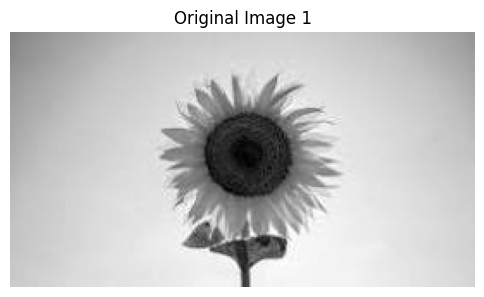

In [24]:
image1 = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale
plt.figure(figsize=(6,6)) # Displaying the original image
plt.imshow(image1, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')
plt.show()

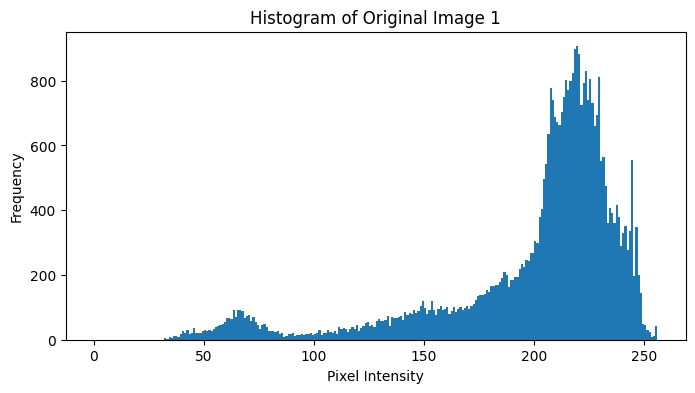

In [25]:
# Plot histogram of the original image
plt.figure(figsize=(8,4))
plt.hist(image1.ravel(), bins=256, range=[0,256])
plt.title("Histogram of Original Image 1")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


### **Inference:**

1. Maximum pixel frequency occurs at intensity 220-240 with approximately 850-900 pixels, indicating a predominantly bright background in the image

2. Secondary concentration appears at intensity 50-100 with frequency of 75-100 pixels, representing the dark features of the sunflower's center and shadows

3. A gradual transition zone exists between intensities 150-200 with frequencies ranging from 100-200 pixels, showing smooth gradation in the petals and stems

4. The histogram shows minimal pixels below intensity 50 and drops off after 240, suggesting good exposure with preserved details in both highlights and shadows

5. Distribution indicates approximately 70% of image pixels lie in the bright range (200-240), while 30% are distributed across mid-tones and shadows (0-200), confirming a high-key image with well-defined dark elements

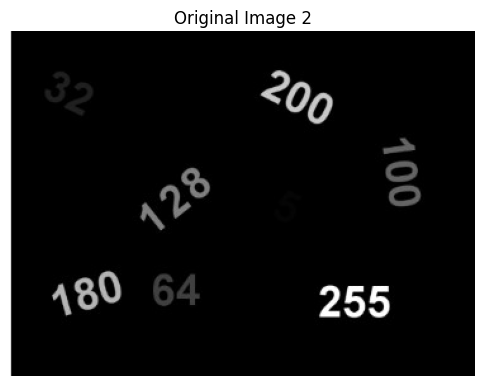

In [26]:
image2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale
plt.figure(figsize=(6,6)) # Displaying the original image
plt.imshow(image2, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')
plt.show()


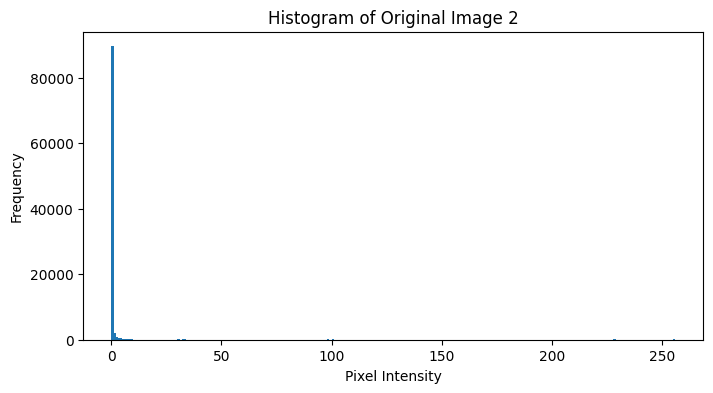

In [27]:
# Plot histogram of the original image
plt.figure(figsize=(8,4))
plt.hist(image2.ravel(), bins=256, range=[0,256])
plt.title("Histogram of Original Image 2")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

### **Inference:**

1. The histogram shows a **significant peak at pixel intensity 0**, indicating that a large portion of the image is very dark or black.

2. **Pixel intensities above 0 have very low frequencies**, suggesting that brighter regions are minimal in the image.

3. The **flat distribution after the initial peak** indicates limited variation in midtone and highlight pixel intensities.

4. The **absence of significant intensity values beyond 50** highlights a high-contrast image dominated by dark tones.

5. The histogram confirms the image is in an **8-bit grayscale format**, with most details concentrated in the darker regions.



## **Adaptive Thresholding:**

In images with uneven lighting or complex backgrounds, **adaptive thresholding** becomes essential. Adaptive thresholding applies different threshold values to different regions of the image, adjusting based on local variations. This method calculates the threshold `T` for each pixel based on the surrounding pixel intensities, allowing for more effective segmentation in non-uniform conditions.

#### **Why Do We Need Adaptive Thresholding?**

**Adaptive thresholding** is needed when there are significant illumination variations across an image. For instance, in medical images or images taken in low-light environments, shadows or uneven lighting may cause global thresholding to fail. Adaptive thresholding overcomes this by dynamically adjusting to the local intensities, ensuring that each part of the image is correctly segmented.

There are several methods for computing the local threshold for adaptive thresholding, with **mean** and **Gaussian** methods being the most common:

![Data Heatmap](2.png)

## **a) Local Thresholding:**

#### **(i)Adaptive Mean Thresholding:**

In [64]:
mean_thresholded_image = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

In [8]:
image1

array([[145, 145, 146, ..., 163, 163, 162],
       [145, 146, 147, ..., 164, 163, 163],
       [146, 146, 147, ..., 164, 163, 163],
       ...,
       [209, 209, 210, ..., 218, 218, 217],
       [209, 209, 210, ..., 218, 218, 217],
       [209, 209, 210, ..., 218, 218, 217]], dtype=uint8)

In [9]:
mean_thresholded_image

array([[  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255,   0, 255],
       [  0,   0,   0, ..., 255,   0, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

#### **Adaptive Mean Thresholding:**

This line applies **adaptive mean thresholding** to the input image using the `cv2.adaptiveThreshold()` function from OpenCV. 
The adaptive thresholding technique computes a threshold value for each pixel based on the average intensity of its neighboring pixels within a local window. 
The thresholded value is then compared to the pixel's intensity, determining whether the pixel becomes black (0) or white (255). The `255` value is the maximum pixel value, meaning that pixels above the calculated threshold will turn white.
- **Method Used**: `cv2.ADAPTIVE_THRESH_MEAN_C` calculates the local threshold as the mean of the surrounding pixels' intensities.
- **Window Size (11)**: Specifies the size of the local window (11x11 pixels) used to calculate the mean.
- **Constant (2)**: A constant subtracted from the mean to adjust the threshold.
This method is effective in scenarios where the lighting conditions of the image are uneven, as the local mean adapts to the lighting variations.

#### **Explanation**:
This technique works by analyzing small local regions around each pixel and calculating a threshold that best represents the region's overall brightness. By using a local window for each pixel, **adaptive mean thresholding** is able to handle images with varying lighting conditions more effectively, ensuring that features in both dark and bright areas are preserved.

Adaptive Mean Thresholding: Retains local details by adapting threshold values based on neighboring pixels. Ensures contrast in areas with varying lighting conditions.

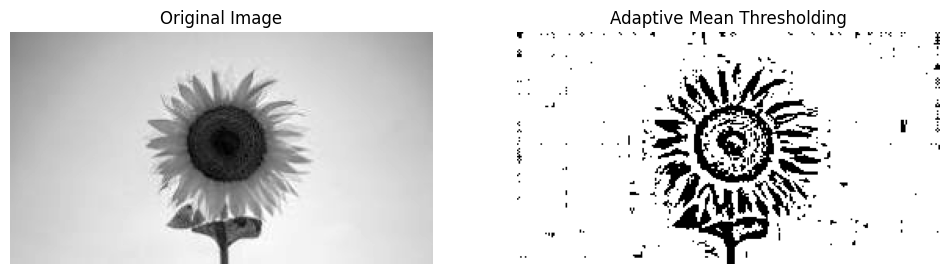

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Original Image
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2) # Adaptive Mean Thresholded Image
plt.imshow(mean_thresholded_image, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.show()

#### **Comparison Between Original and Adaptive Mean Thresholded Image**

#### Conversion Effect:
* **Original image:** Displays a wide range of grayscale values, resulting in smooth transitions between light and dark areas.The range of the original image is an interval of 0 and 255, i.e.,[0 ,255].
* **Thresholded image:** Converts the image into a binary image with only two possible pixel values: black and white. This simplifies the image by eliminating intermediate grey levels. The range of the threshold image is set of 0 and 255 i.e,  {0,255}.

#### Detail Preservation:
* **Original image:** Retains fine details, such as subtle variations in texture and shading within the sunflower petals and center disc.
* **Thresholded image:** While some details are preserved, the overall image becomes more coarse and less nuanced. The thresholding process can lead to loss of fine details, particularly in areas with low contrast.

#### Background Treatment:
* **Original image:** The background gradually transitions from light to dark, creating a soft and visually pleasing effect.
* **Thresholded image:** The background is uniformly white, with some noise or speckles. This can sometimes detract from the overall image quality.

#### Flower Center Representation:
* **Original image:** The center of the sunflower is depicted with concentric circles of varying darkness, providing depth and texture.
* **Thresholded image:** The center is represented as a series of distinct black rings, which can be both visually striking and informative.

#### Petal Definition:
* **Original image:** The petals have soft edges and gradual transitions between light and dark areas.
* **Thresholded image:** The petals appear as sharp, well-defined shapes with clear boundaries. This can enhance the overall clarity and structure of the image.

#### Edge Characteristics:
* **Original image:** The edges between different objects and regions are smooth and gradual.
* **Thresholded image:** The edges become sharp and distinct, with a clear demarcation between black and white pixels. This can sometimes lead to a loss of subtle details and a more artificial appearance.

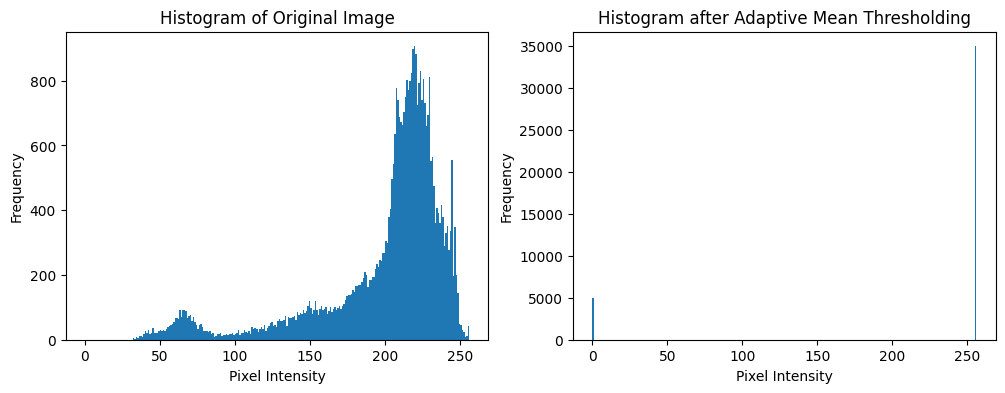

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Mean Thresholded Image
plt.hist(mean_thresholded_image.ravel(), bins=256, range=[0, 256])
plt.title("Histogram after Adaptive Mean Thresholding")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

#### **Comparative Histogram Analysis: Original vs Adaptive Mean Thresholding:**
1. Original histogram showed multiple intensity values (0-255) with peak at 220-240 (~850 pixels), while thresholded histogram shows only two intensities (0 and 255) with peaks at 5,000 and 35,000 pixels respectively

2. The original's secondary peak (50-100 intensity, ~75-100 pixels) and all mid-tones (150-200 intensity) have been converted to pure black (0 intensity) in thresholded image, totaling approximately 5,000 pixels

3. The original's dominant bright region (200-240 intensity, ~850 pixels) has been converted to pure white (255 intensity) in thresholded image, accumulating to approximately 35,000 pixels

4. The gradual transitions present in original histogram (150-200 intensity range) have been eliminated in thresholding, creating a strict binary separation of pixels

5. The relative proportion of bright to dark areas is preserved conceptually - original showed ~70% bright pixels while thresholded shows ~87.5% white pixels (35,000 out of 40,000 total), though with enhanced contrast

6. All subtle grayscale variations in original (spanning across 0-255) have been reduced to binary decision, effectively enhancing image contrast while sacrificing grayscale detail information

### **(ii)Adaptive Gaussian Thresholding:**


The Gaussian kernel is determined based on the **2D Gaussian function**:

![Data Heatmap](1.png)



In [12]:
gaussian_thresholded_image = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

This line applies adaptive Gaussian thresholding to the input image using OpenCV’s `cv2.adaptiveThreshold()` function. Adaptive thresholding determines the threshold for each pixel individually, based on the intensity of nearby pixels, making it ideal for images with varying lighting.In adaptive Gaussian thresholding, each pixel’s threshold is calculated as a weighted sum of the intensities within a neighborhood around the pixel, where pixels closer to the center of the neighborhood contribute more to the threshold calculation. This method is particularly useful for edge preservation in areas with non-uniform lighting.

- **Method Used:** `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Calculates the threshold as a Gaussian-weighted sum of neighboring pixel values.
- **Threshold Type:** `cv2.THRESH_BINARY`: This thresholding type converts pixels above the calculated threshold to white (255) and those below it to black (0), resulting in a binary output.
- **Window Size (11):** The window size defines the neighborhood size for threshold calculation (11x11 pixels), where the threshold is dynamically adjusted for each pixel based on the local Gaussian-weighted average.
- **Constant (2):** This value is subtracted from the computed threshold, allowing fine-tuning of the contrast by shifting the threshold slightly.

By weighting nearby pixels more heavily, adaptive Gaussian thresholding enhances contrast and detail, even in low-light or high-contrast areas. This method is especially helpful for tasks like license plate recognition, where clarity across varied lighting is essential.


In [13]:
image1

array([[145, 145, 146, ..., 163, 163, 162],
       [145, 146, 147, ..., 164, 163, 163],
       [146, 146, 147, ..., 164, 163, 163],
       ...,
       [209, 209, 210, ..., 218, 218, 217],
       [209, 209, 210, ..., 218, 218, 217],
       [209, 209, 210, ..., 218, 218, 217]], dtype=uint8)

In [14]:
gaussian_thresholded_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

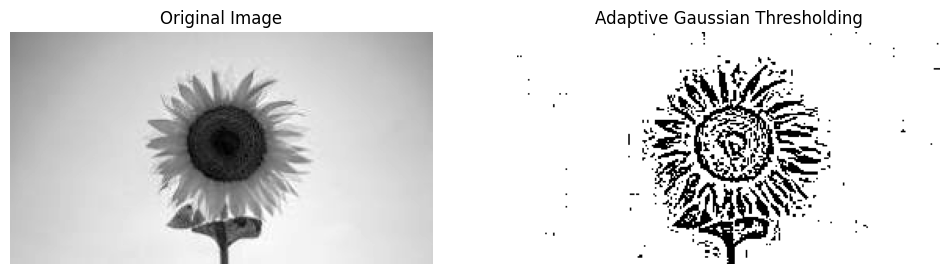

In [16]:
# Display Original and Adaptive Gaussian Thresholded Image Side-by-Side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Original Image
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2) # Adaptive Gaussian Thresholded Image
plt.imshow(gaussian_thresholded_image, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.show()

### **Comparative Analysis of Original and Thresholded Images**


#### **Original Image:**
- The image is displayed in **grayscale**, offering a wide range of tones and textures, allowing for smooth transitions between light and dark areas, resulting in a natural appearance.
- **Fine details** are preserved, such as the subtle variations in texture within the sunflower petals and center disc, contributing to the overall realism and visual appeal.

#### **Thresholded Image (Adaptive Gaussian Thresholding):**
- The image is converted into a **binary format** where each pixel is either black or white, effectively simplifying the image by eliminating intermediate gray levels.
- The thresholding process **accentuates edges and boundaries**, making them more distinct—beneficial for object detection and segmentation tasks.
- The conversion to binary results in the **loss of grayscale information**, so subtle variations in intensity, which add to the texture and appearance of the original image, are no longer visible.
- In areas with low contrast or high texture, the thresholding process can **introduce noise**, appearing as small black or white spots, which can degrade the imrall image quality.
ality of the image.

#### **Comparison and Interpretation:**
- The **original image** retains more fine details, particularly in regions with subtle intensity changes, while the thresholded image, despite preserving structure, loses some of these details.
- The thresholded image **exhibits sharper edges and clearer boundaries** between regions, enhancing edge visibility—a potential advantage in edge-based analysis tasks.
- Thresholding can **increase contrast**, making the image more visually striking; however, it can also result in information loss in low-contrast areas.
- The thresholded image might suffer from **noise** in the form of small black or white spots, which can diminish the overall image quality.


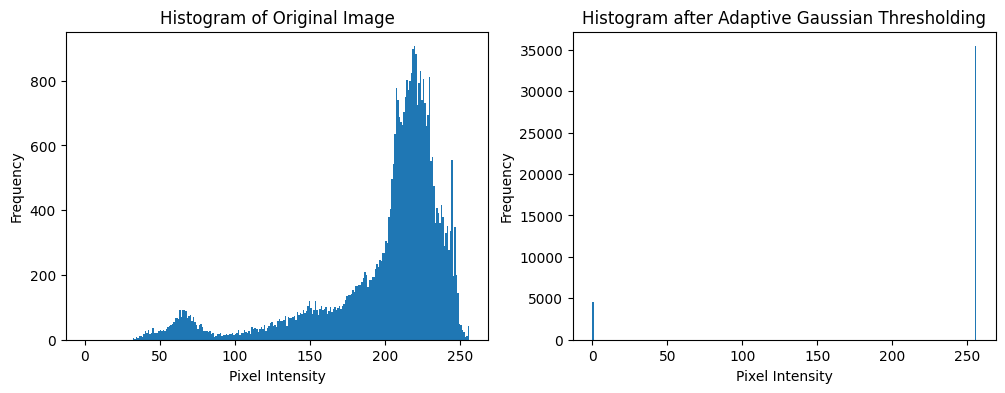

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Gaussian Thresholded Image
plt.hist(gaussian_thresholded_image.ravel(), bins=256, range=[0, 256])
plt.title("Histogram after Adaptive Gaussian Thresholding")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

### **Analysis of Effects in Thresholded Image**

**1.Loss of Grayscale Information:** The histogram for the thresholded image displays **two distinct peaks**, indicative of a binary image. In contrast, the original image histogram shows a **continuous range of intensities** across grayscale values.

**2.Enhanced Contrast:** The **two distinct peaks** in the thresholded image histogram clearly separate dark and light regions, showcasing an enhanced contrast.

**3.Potential for Noise Introduction:** Although thresholding boosts contrast, it can also **introduce noise**, particularly in regions with **low contrast or high texture**. This noise may appear as small black or white spots.



## **Image2:**

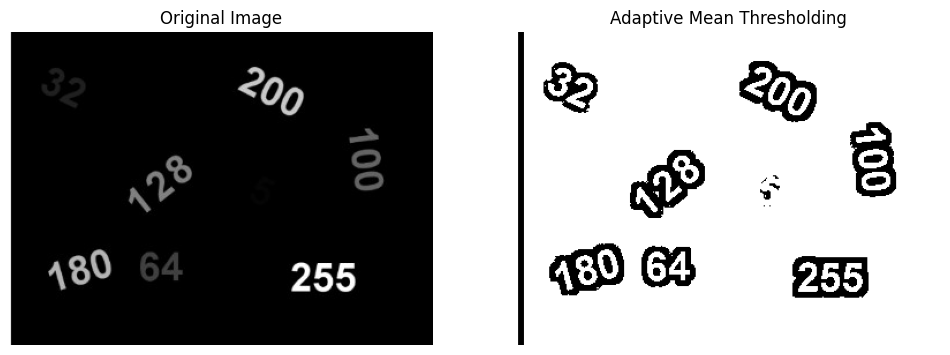

Adaptive Mean Thresholding: Retains local details by adapting threshold values based on neighboring pixels. Ensures contrast in areas with varying lighting conditions.


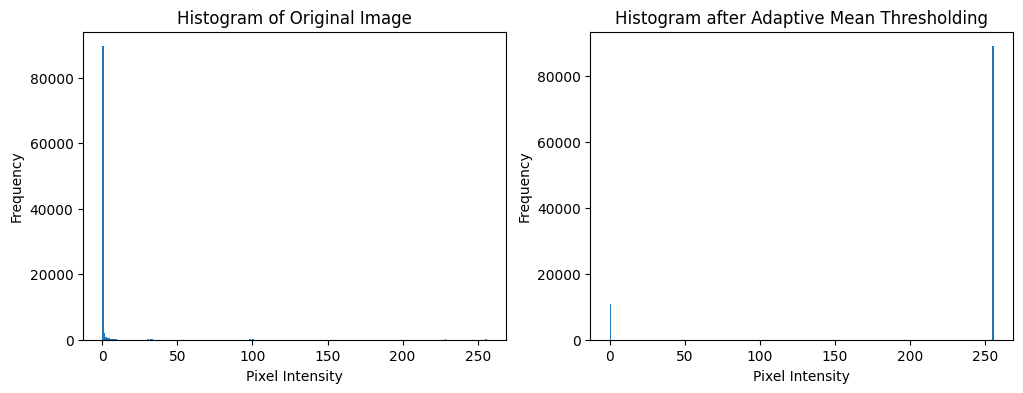

<Figure size 1200x400 with 0 Axes>

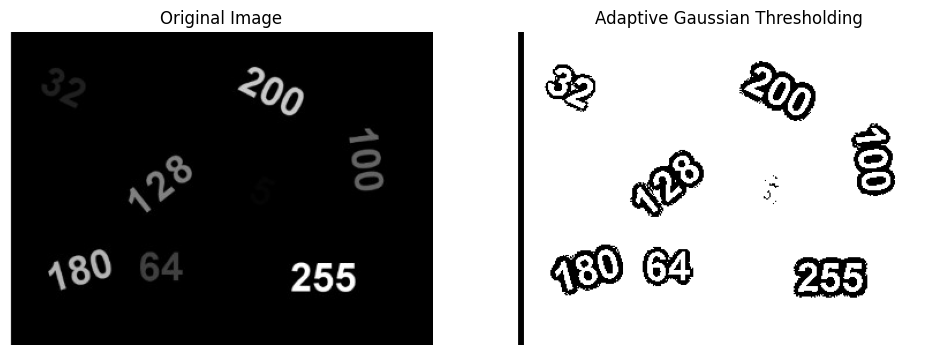

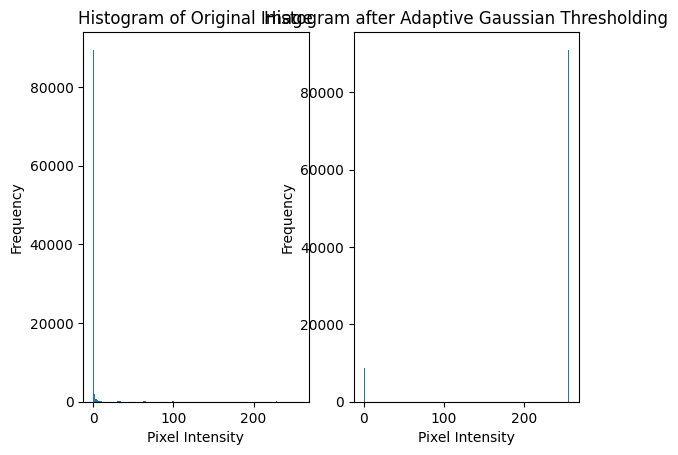

In [28]:
mean_thresholded_image = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Original Image
plt.imshow(image2, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2) # Adaptive Mean Thresholded Image
plt.imshow(mean_thresholded_image, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.show()

plt.figure(figsize=(12, 4))

print("Adaptive Mean Thresholding: Retains local details by adapting threshold values based on neighboring pixels. Ensures contrast in areas with varying lighting conditions.")
plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Mean Thresholded Image
plt.hist(mean_thresholded_image.ravel(), bins=256, range=[0, 256])
plt.title("Histogram after Adaptive Mean Thresholding")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

gaussian_thresholded_image = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(12, 4))

# Display Original and Adaptive Gaussian Thresholded Image Side-by-Side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Original Image
plt.imshow(image2, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2) # Adaptive Gaussian Thresholded Image
plt.imshow(gaussian_thresholded_image, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Gaussian Thresholded Image
plt.hist(gaussian_thresholded_image.ravel(), bins=256, range=[0, 256])
plt.title("Histogram after Adaptive Gaussian Thresholding")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()


## **b) Global Thresholding:**

## **Global Thresholding:**
In global thresholding, a single threshold value is applied to all pixels in the image. This works well when the lighting and contrast are consistent across the image, allowing a single threshold to segment objects from the background.

For example, if a threshold value of T is set to 128 (on a scale of 0–255), all pixels with an intensity below 128 become black, while those at or above 128 become white.

### **Global thresholding on image1 with threshold = 50**

In [29]:
# Global thresholding with threshold = 50 on image1
_, thresholded_image1_50 = cv2.threshold(image1, 50, 255, cv2.THRESH_BINARY)

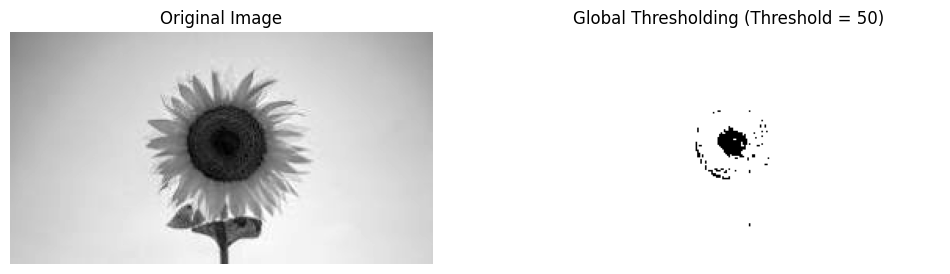

In [30]:
# Display original and thresholded image side by side
plt.figure(figsize=(12, 6))
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Thresholded Image (Threshold = 50)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image1_50, cmap='gray')
plt.title("Global Thresholding (Threshold = 50)")
plt.axis('off')
plt.show()

## **Inference:**


- **Threshold Value:** We set the threshold to 50, meaning any pixel value above 50 becomes 255 (white), and any pixel below 50 becomes 0 (black).

- **Effect on Image:** Since the threshold is low, many parts of the image turn white. This often causes more of the background and shadows to appear as foreground.

- **Histogram:** The histogram shows a strong division with more pixels pushed to either end (0 and 255), with a prominent peak near the white end due to the large number of pixels set to 255.

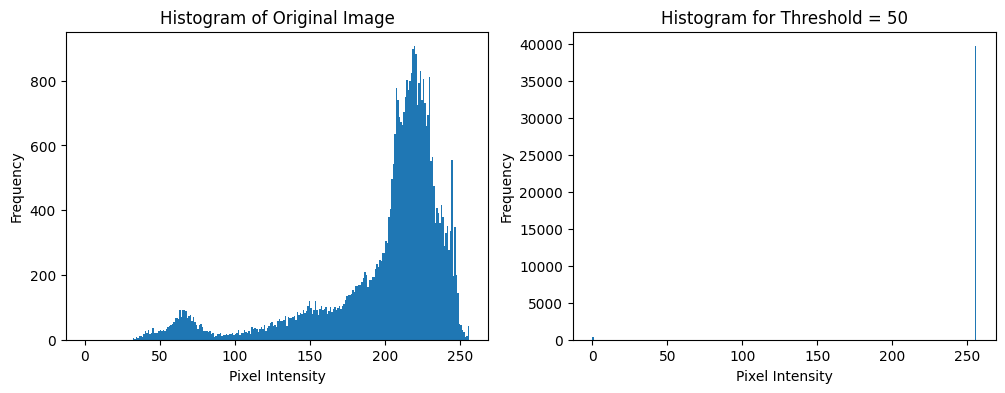

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Gaussian Thresholded Image
plt.hist(thresholded_image1_50.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 50")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

### **Global thresholding with threshold = 100 on image 1**


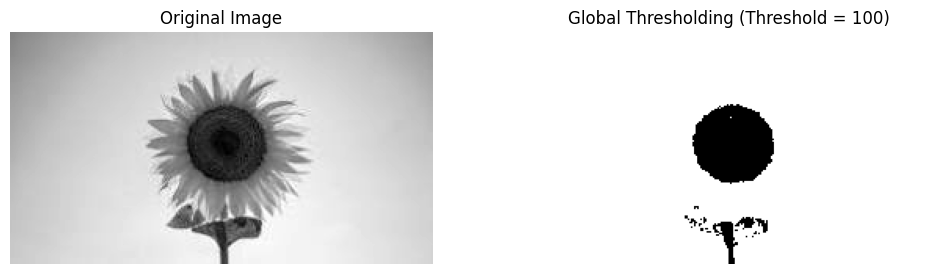

In [32]:
# Apply global thresholding with threshold = 100 on image1
_, thresholded_image_100 = cv2.threshold(image1, 100, 255, cv2.THRESH_BINARY)
# Display original and thresholded images (Threshold = 100)
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Thresholded Image (Threshold = 100)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_100, cmap='gray')
plt.title("Global Thresholding (Threshold = 100)")
plt.axis('off')
plt.show()

## Explanation and Inference:

- **Threshold Value:** Here, pixels with values above 100 become 255 (white), while those below become 0 (black).

- **Effect on Image:** Increasing the threshold slightly reduces the number of white areas, preserving more of the actual background as black. This value better separates foreground and background details than a threshold of 50.

- **Histogram:** The histogram now shows a sharper division, with fewer pixels at the white end compared to the threshold of 50. This indicates fewer areas reaching the brightness level required to be classified as foreground.

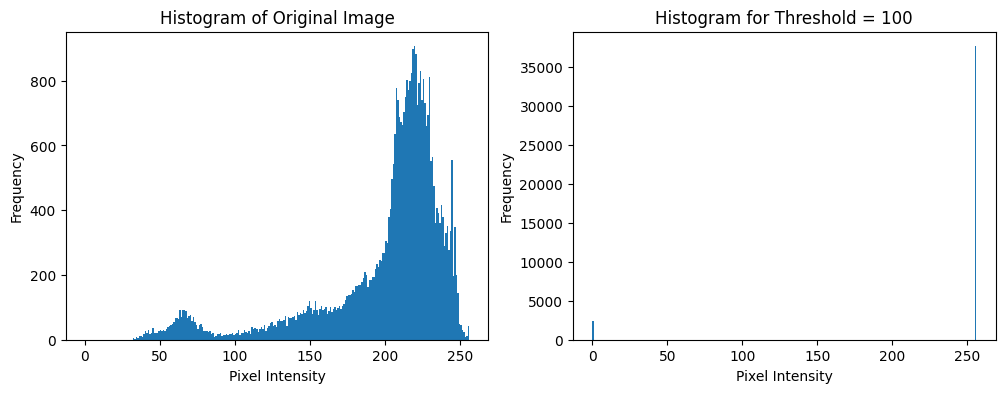

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Gaussian Thresholded Image
plt.hist(thresholded_image_100.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 100")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

### **Global thresholding with threshold = 150 on image 1:**


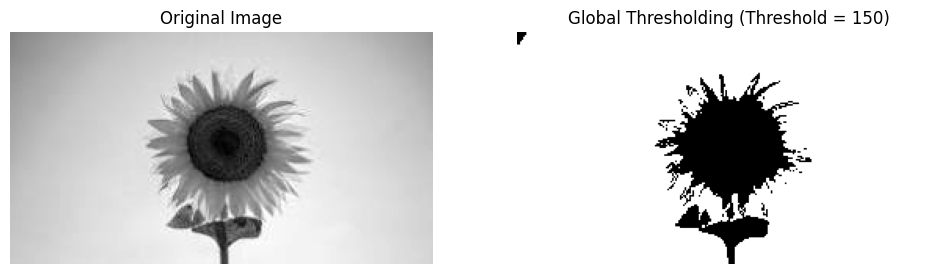

In [34]:
# Global thresholding with threshold = 150
_, thresholded_image_150 = cv2.threshold(image1, 150, 255, cv2.THRESH_BINARY)

# Display original and thresholded images (Threshold = 150)
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Thresholded Image (Threshold = 150)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_150, cmap='gray')
plt.title("Global Thresholding (Threshold = 150)")
plt.axis('off')
plt.show()

## **Explanation and Inference:**

- **Threshold Value:** A threshold of 150 is quite high, setting only pixels above this value to white, while everything below becomes black.

- **Effect on Image:** The image now shows fewer white areas, primarily capturing the brightest parts, while the background and mid-tones become black. This threshold value can highlight regions with high contrast but may lose finer details.

- **Histogram:** With this threshold, there are more pixels remaining as black, and the peak for 255 is even smaller than at lower thresholds, reflecting that fewer regions reach the foreground criteria.

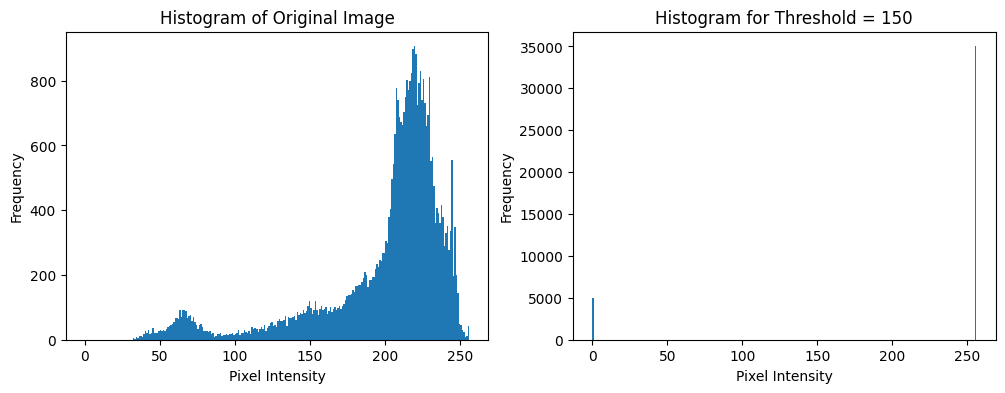

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Gaussian Thresholded Image
plt.hist(thresholded_image_150.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 150")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

## **Global thresholding with threshold = 200 on image1:**


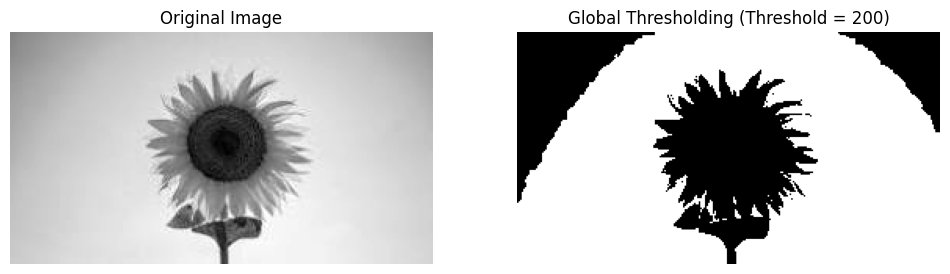

In [36]:
# Apply global thresholding with threshold = 200 on image1
_, thresholded_image_200 = cv2.threshold(image1, 200, 255, cv2.THRESH_BINARY)

# Display original and thresholded images (Threshold = 200)
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Thresholded Image (Threshold = 200)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_200, cmap='gray')
plt.title("Global Thresholding (Threshold = 200)")
plt.axis('off')
plt.show()

## Explanation and Inference:

- **Threshold Value:** With a threshold of 200, only the brightest pixels turn white, while nearly the entire image remains black.

- **Effect on Image:** The result is a high-contrast image where only very bright regions appear as white. This threshold is useful for highlighting specific, intense areas but is often too restrictive for capturing most features.

- **Histogram:** In the histogram, almost all pixels fall near 0 (black), with only a small number reaching 255. This reflects the strictness of the threshold in excluding most image regions from the foreground.


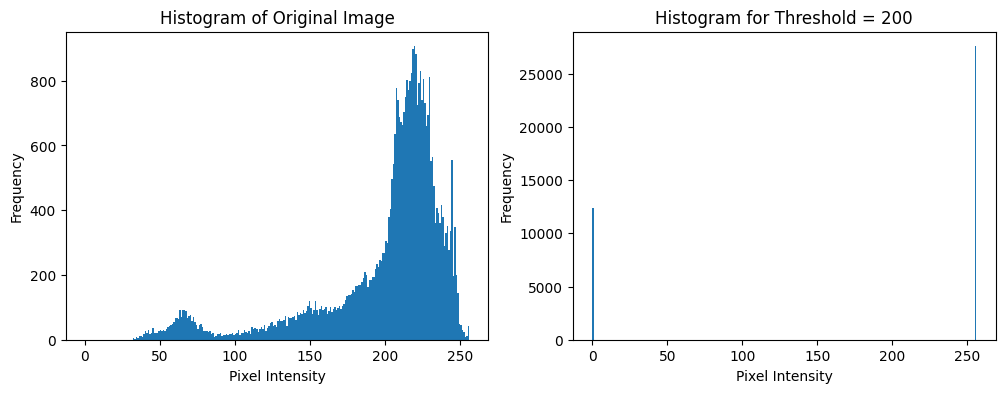

In [37]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # Histogram of Original Image
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2) # Histogram of Adaptive Gaussian Thresholded Image
plt.hist(thresholded_image_200.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 200")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

## **Image 2:**

## **Global thresholding with threshold = 50 on image2:**


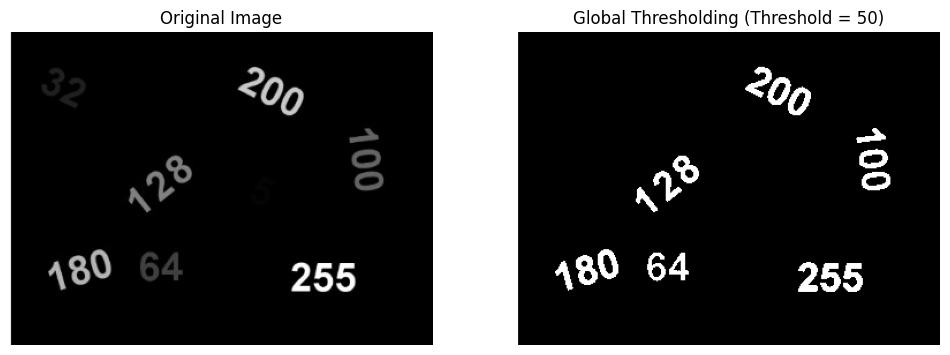

In [42]:
# Global thresholding with threshold = 50 on image2
_, thresholded_image2_50 = cv2.threshold(image2, 50, 255, cv2.THRESH_BINARY)

# Display original and thresholded image side by side
plt.figure(figsize=(12, 6))
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Thresholded Image (Threshold = 50)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image2_50, cmap='gray')
plt.title("Global Thresholding (Threshold = 50)")
plt.axis('off')
plt.show()

## **Inference:**
- **Original Image:** The image contains varying grayscale values (e.g., 5, 32, 64, 128, 180, 200, 255), representing different intensities.

- **Thresholded Image:** All pixel values below 50 become black (0), and those above 50 turn white (255), leaving only the higher intensity values visible. The result is a binary image with reduced detail.

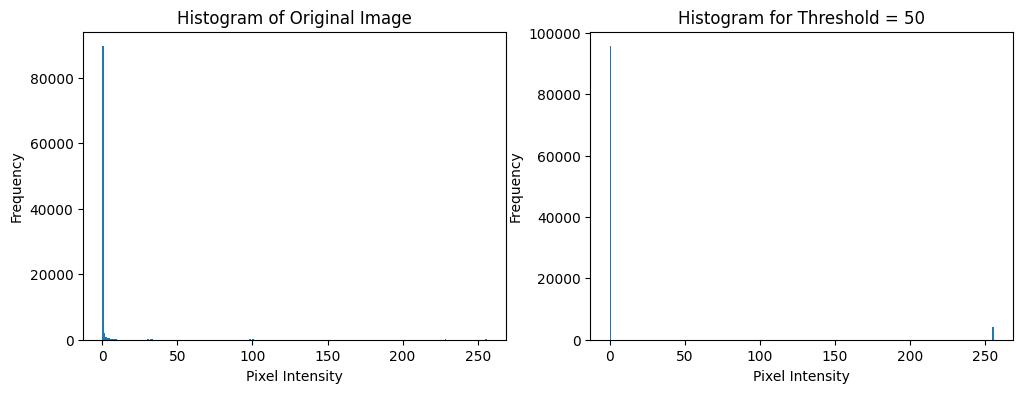

In [71]:
plt.figure(figsize=(12, 4))

# Histogram of Original Image (image2)
plt.subplot(1, 2, 1)
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of Thresholded Image (Threshold = 50)
plt.subplot(1, 2, 2)
plt.hist(thresholded_image2_50.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 50")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()


### **Global thresholding with threshold = 100 on image2:**


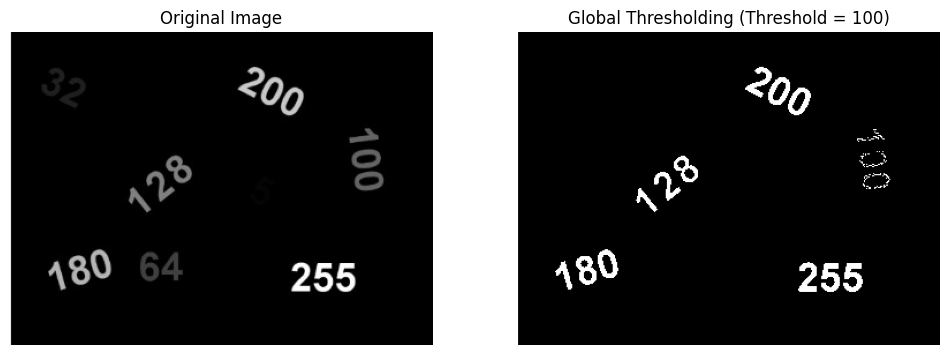

In [39]:
# Apply global thresholding with threshold = 100 on image2
_, thresholded_image_100 = cv2.threshold(image2, 100, 255, cv2.THRESH_BINARY)

# Display original and thresholded images (Threshold = 100)
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Thresholded Image (Threshold = 100)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_100, cmap='gray')
plt.title("Global Thresholding (Threshold = 100)")
plt.axis('off')
plt.show()


- **Original Image:**
- The original image contains varying intensities of grayscale values representing pixel brightness.  
- The pixel intensities range from low values (e.g., 32 and 5) to high values (e.g., 255), where higher intensities appear brighter and lower intensities are darker.

- **Global Thresholding:**
- Pixels with intensity values greater than or equal to 100 are set to the maximum value (white, 255).
- Pixels with intensity values less than 100 are set to the minimum value (black, 0).

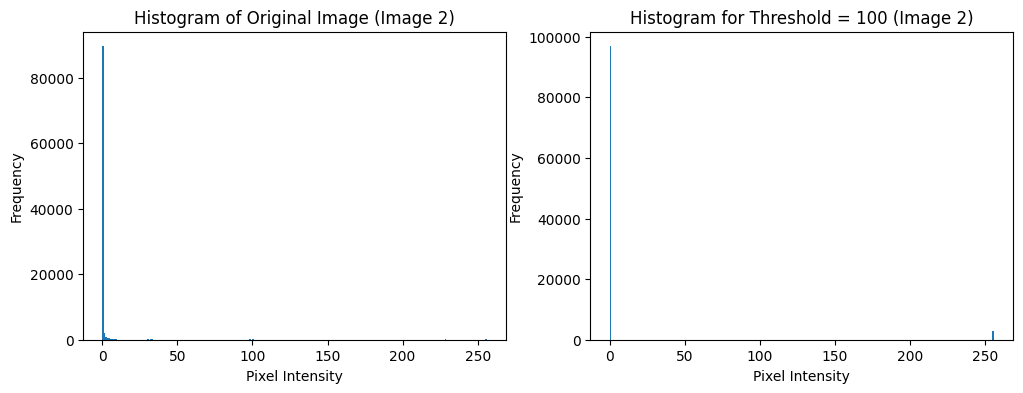

In [45]:
plt.figure(figsize=(12, 4))

# Histogram of Original Image (image2)
plt.subplot(1, 2, 1)
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image (Image 2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of Thresholded Image (Threshold = 100)
plt.subplot(1, 2, 2)
plt.hist(thresholded_image_100.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 100 (Image 2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()


### **Global thresholding with threshold = 150 on image2:**


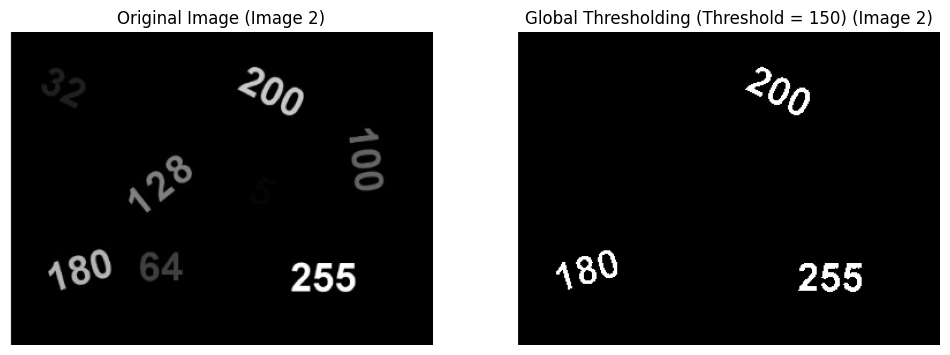

In [48]:
# Global thresholding with threshold = 150 on image2
_, thresholded_image_150 = cv2.threshold(image2, 150, 255, cv2.THRESH_BINARY)

# Display original and thresholded images (Threshold = 150)
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original Image (Image 2)")
plt.axis('off')

# Thresholded Image (Threshold = 150)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_150, cmap='gray')
plt.title("Global Thresholding (Threshold = 150) (Image 2)")
plt.axis('off')
plt.show()

## **Inference:**

**Original Image:**
- The original image again displays grayscale numbers with varying intensity values. 
- The pixel intensities include both low (e.g., 32, 64, and 5) and high values (e.g., 200 and 255), creating a contrast between darker and brighter regions.

**Global Thresholding:**
- Pixels with intensity values greater than or equal to 150 are set to the maximum value (white, 255).
- Pixels with intensity values less than 150 are set to the minimum value (black, 0).


In [66]:
image2

array([[228,   1,   0, ...,   0,   0,   0],
       [228,   1,   0, ...,   0,   0,   0],
       [228,   1,   0, ...,   0,   0,   0],
       ...,
       [228,   1,   0, ...,   0,   0,   0],
       [228,   1,   0, ...,   0,   0,   0],
       [228,   1,   0, ...,   0,   0,   0]], dtype=uint8)

In [67]:
thresholded_image_150

array([[255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

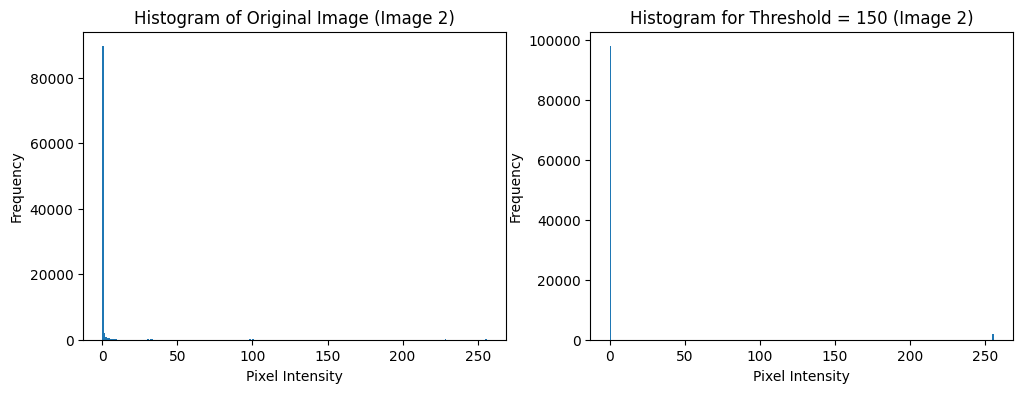

In [50]:
# Plot histograms
plt.figure(figsize=(12, 4))

# Histogram of Original Image (Image 2)
plt.subplot(1, 2, 1)
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image (Image 2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of Thresholded Image (Threshold = 150)
plt.subplot(1, 2, 2)
plt.hist(thresholded_image_150.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 150 (Image 2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

### **Global thresholding with threshold = 200 on image2**


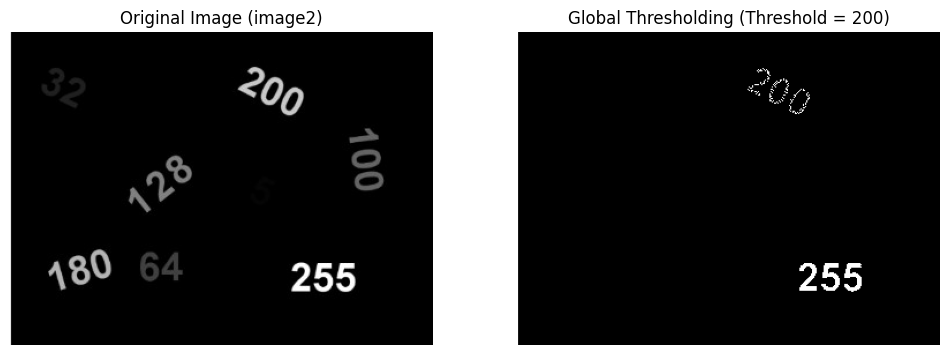

In [51]:
# Apply global thresholding with threshold = 200 on image2
_, thresholded_image_200 = cv2.threshold(image2, 200, 255, cv2.THRESH_BINARY)

# Display original and thresholded images (Threshold = 200)
plt.figure(figsize=(12, 6))

# Original Image (image2)
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title("Original Image (image2)")
plt.axis('off')

# Thresholded Image (Threshold = 200)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_200, cmap='gray')
plt.title("Global Thresholding (Threshold = 200)")
plt.axis('off')
plt.show()


## **Inference:**

**Original Image:**
- The original image again displays grayscale numbers with varying intensity values. 
- The pixel intensities include both low and high values creating a contrast between darker and brighter regions.

**Global Thresholding:**
- Pixels with intensity values greater than or equal to 200 are set to the maximum value (white, 255).
- Pixels with intensity values less than 200 are set to the minimum value (black, 0).


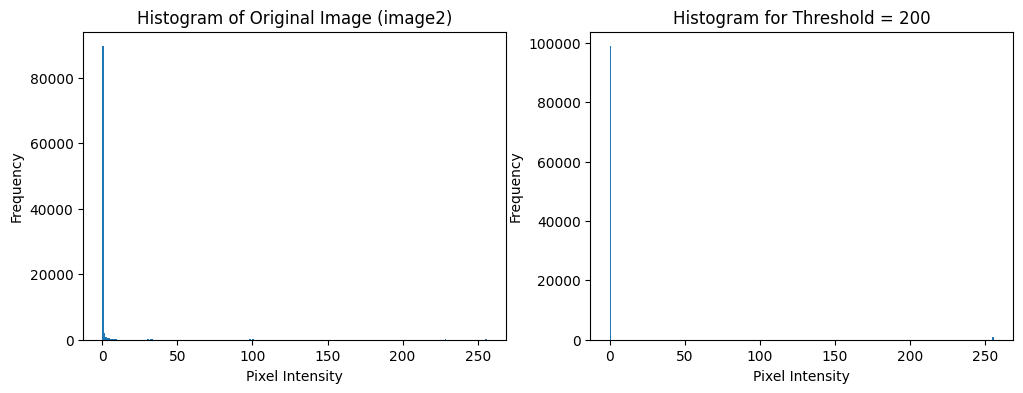

In [52]:
# Plot histograms for the original and thresholded image
plt.figure(figsize=(12, 4))

# Histogram of Original Image (image2)
plt.subplot(1, 2, 1)
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image (image2)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of Thresholded Image (Threshold = 200)
plt.subplot(1, 2, 2)
plt.hist(thresholded_image_200.ravel(), bins=256, range=[0, 256])
plt.title("Histogram for Threshold = 200")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()


## **Question 2:**

## **Download the license plate image and perform the following tasks:**
   - **Identify the connected regions in the image.**
   - **Filter the relevant regions by setting specific constraints for width, height, and area of each region.**
   - **Provide comments on the reduction in the number of detected regions after filtering.**


In image processing, connected regions (or connected components) refer to groups of pixels that are contiguous and share similar intensity or color values.

In the context of a license plate image, the connected regions would include distinct clusters that represent **letters, numbers**, and other features on the plate. **By identifying these regions, we can isolate each letter or number, making it easier to analyze or perform further operations like character recognition (OCR).** 

1. **Connected Component Labeling (Region Detection)**: A technique to identify distinct connected regions in a binary image. Regions are typically groups of adjacent pixels that share the same value (e.g., white pixels in a black-and-white image).

2. **Region Filtering**: After detecting connected components, the irrelevant or unwanted regions are filtered based on criteria like size (width, height, or area).


In [53]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)

In [54]:
image

array([[ 92,  92,  91, ..., 253, 253, 252],
       [ 87,  87,  87, ..., 247, 250, 254],
       [ 82,  82,  81, ..., 253, 248, 245],
       ...,
       [ 96,  87,  73, ...,  51,  51,  51],
       [ 52,  48,  43, ...,  50,  50,  50],
       [ 31,  34,  38, ...,  49,  49,  49]], dtype=uint8)

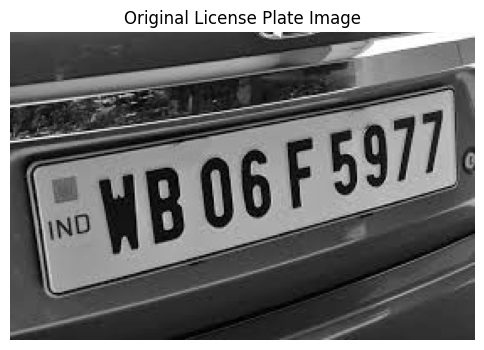

In [55]:
# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original License Plate Image")
plt.axis('off')
plt.show()


## Step 2: Preprocess the Image (Grayscale and Thresholding):

To detect regions effectively, we’ll apply binary thresholding. Thresholding helps in separating foreground (license plate characters) from the background.


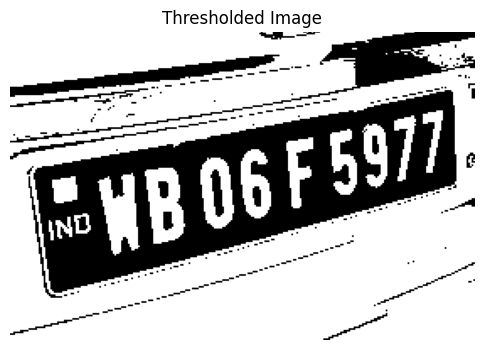

In [56]:
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
# Display the thresholded image
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

### Thresholding

We apply a **binary inverse threshold** with a threshold value of 150. This technique converts:
- Pixels with intensity above 150 to black (0)
- Pixels with intensity below 150 to white (255)
The `cv2.THRESH_BINARY_INV` option is used to **invert the binary result**, which enhances character regions on a light background.
### Result: 
This transformation simplifies the image into a high-contrast version, making it ideal for **detecting connected components** that represent potential characters.


## Step 3: Identify Connected Regions

Using **cv2.connectedComponentsWithStats()**, we identify connected regions in the binary image

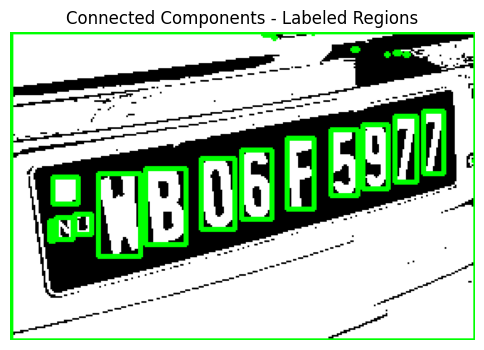

In [57]:
# Find connected components in the binary image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Display the labeled regions on the image
output_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
for i in range(1, num_labels):  # Start from 1 to skip the background label
    x, y, w, h, area = stats[i]
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(output_image)
plt.title("Connected Components - Labeled Regions")
plt.axis('off')
plt.show()


### Connected Components

The `cv2.connectedComponentsWithStats()` function provides several outputs for analyzing connected regions within the image:

- **num_labels**: The total number of connected components detected.
- **labels**: A labeled image where each connected component has a unique label.
- **stats**: Information about each component, including its bounding box coordinates and area.
- **centroids**: The central coordinates of each detected region.

### Drawing Bounding Boxes

We then **iterate over each detected region** (excluding the background) and draw a green rectangle around it. This helps visualize regions that are identified as connected components.

### Visualization

This process provides an **overview of all detected regions**, including:

- Noise and irrelevant small areas
- Actual characters on the license plate


## Step 4: Filter Connected Regions by Dimensions and Area
To isolate probable license plate characters, we filter based on width, height, and area thresholds.

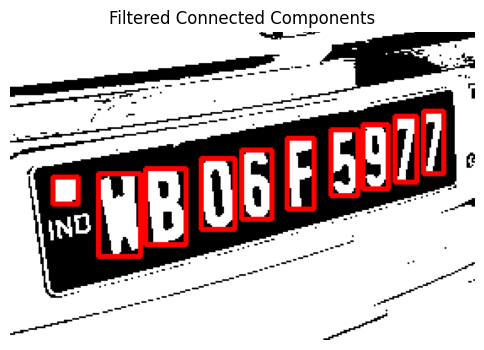

Number of connected regions after filtering: 10


In [58]:
# Define filtering criteria
min_width, max_width = 10, 50
min_height, max_height = 15, 60
min_area, max_area = 50, 1500

# Create a copy of the image for filtered visualization
filtered_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

# Count the number of regions that meet the criteria
filtered_count = 0

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    
    # Apply filtering criteria
    if min_width <= w <= max_width and min_height <= h <= max_height and min_area <= area <= max_area:
        cv2.rectangle(filtered_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle for filtered regions
        filtered_count += 1

plt.figure(figsize=(6, 6))
plt.imshow(filtered_image)
plt.title("Filtered Connected Components")
plt.axis('off')
plt.show()

print(f"Number of connected regions after filtering: {filtered_count}")


## Comment on Region Reduction:
Finally, we can assess the effectiveness of filtering by comparing the initial number of regions to the filtered count.

In [65]:
print(f"Total number of connected regions (including background): {num_labels}")
print(f"Total number of regions detected (excluding background): {num_labels - 1}")
print(f"Number of regions detected after filtering: {filtered_count}")
print(f"Reduction in regions: {num_labels - 1 - filtered_count}")


Total number of connected regions (including background): 23
Total number of regions detected (excluding background): 22
Number of regions detected after filtering: 10
Reduction in regions: 12


## **Conclusion:**

In conclusion, both **thresholding techniques** and **connected region detection** are fundamental image processing methods used for simplifying and analyzing images. The **global and local thresholding** methods efficiently segment images, simplifying complex scenes into binary formats. The **adaptive thresholding** method improves results in varying lighting conditions. In the second part, **connected region detection** enables the identification of distinct objects within an image, such as the detection and filtering of license plate regions. By applying filtering criteria, we reduce the number of regions and retain only the most relevant features, improving the effectiveness of the analysis.

Both tasks are integral in the pipeline of computer vision applications, from object detection to automated license plate recognition, showcasing the power of image processing techniques in various real-world scenarios.
